In [11]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt


In [12]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose(
    [transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose(
    [transforms.ToTensor()]))


In [13]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)


In [14]:
import torch.nn as nn
import torch.nn.functional as F


In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [16]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view( -1 , 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0676, grad_fn=<NllLossBackward>)
tensor(0.0868, grad_fn=<NllLossBackward>)
tensor(0.0071, grad_fn=<NllLossBackward>)


In [17]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print('Accuracy: ', round(correct/total, 3))

Accuracy:  0.978


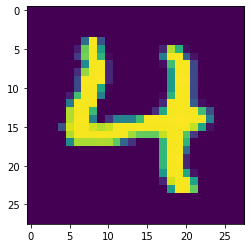

tensor(4)


In [22]:
plt.imshow(X[2].view(28,28))
plt.show()

print(torch.argmax(net(X[2].view(-1,784))[0]))